<a href="https://colab.research.google.com/github/stardustmayank/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression in practice


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
m = x_train.shape[0]

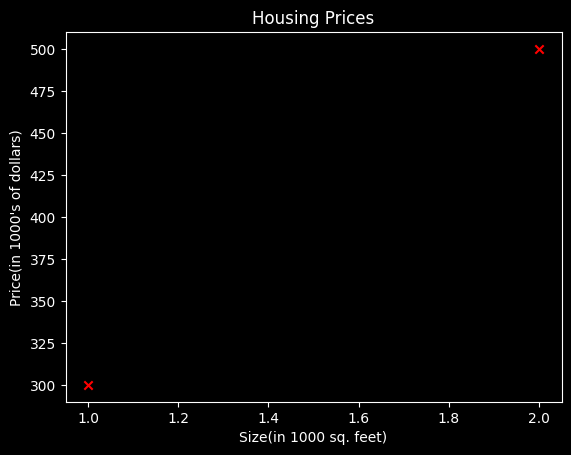

In [ ]:
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.title('Housing Prices')
plt.xlabel('Size(in 1000 sq. feet)')
plt.ylabel('Price(in 1000\'s of dollars)')
plt.show()

In [ ]:
w, b = 200, 100

In [ ]:
def compute_price(x, w, b):
  m = x.shape[0]
  y_hats = np.zeros(m)
  for i in range(m):
    y_hats[i] = w*x[i] + b
  return y_hats

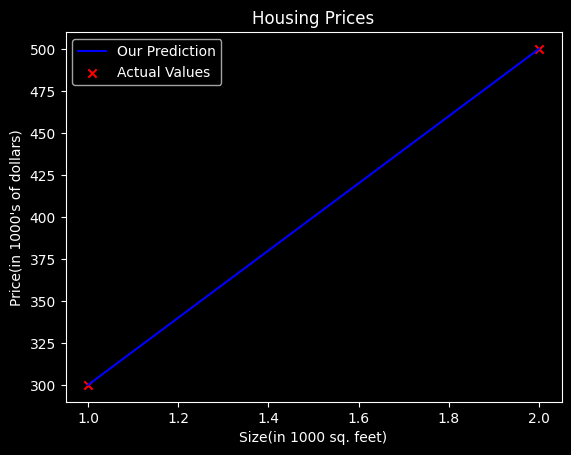

In [ ]:
predicted_values = compute_price(x_train, w, b)
plt.plot(x_train, predicted_values, c='b', label='Our Prediction')
plt.scatter(x_train, y_train, marker = 'x', c = 'r', label = 'Actual Values')
plt.title('Housing Prices')
plt.xlabel('Size(in 1000 sq. feet)')
plt.ylabel('Price(in 1000\'s of dollars)')
plt.legend()
plt.show()

In [ ]:
size = float(input('What is the size of the property(in 1000 sq. feet)?'))
predicted_cost = w*size + b
print(f'The estimated cost for a property of size {size} is {predicted_cost*1000} dollars')

What is the size of the property(in 1000 sq. feet)?2.8
The estimated cost for a property of size 2.8 is 660000.0 dollars


##Cost function for Linear Regression

In [ ]:
def cost_function(x, y, w, b):
  m = len(x)
  cost_sum = 0
  for i in range(m):
    f_wb = w*x[i] + b
    cost = (f_wb - y[i])**2
    cost_sum += cost
  total_cost = cost_sum / (2*m)
  return total_cost

##Gradient Descent for Linear Regression

In [ ]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    f_wb = w*x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = f_wb - y[i]
    dj_dw += dj_dw_i
    dj_db += dj_db_i
  dj_dw /= m
  dj_db /= m
  return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_init, b_init, alpha, iterations, cost_function, compute_gradient):
  cost_history = []
  parameters_history = []
  w = w_init
  b = b_init
  for i in range(iterations):
    dj_dw, dj_db = compute_gradient(x, y, w, b)
    w = w - alpha*dj_dw
    b = b - alpha*dj_db
    # Preventing resource exhaustion by setting an upper limit of 100,000 iterations
    if i  < 100000:
      cost_history.append(cost_function(x, y, w, b))
      parameters_history.append([w, b])
      if i % math.ceil(iterations/10) == 0:
        print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
  return w, b, cost_history, parameters_history

In [ ]:
w_init, b_init, alpha, iterations = 0, 0, 0.001, 100000
w_final, b_final, cost_history, parameters_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, cost_function, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 8.44e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e-01, b: 4.00000e-01
Iteration 10000: Cost 3.42e+00  dj_dw: -3.713e-01, dj_db:  6.008e-01   w:  1.949e+02, b: 1.08235e+02
Iteration 20000: Cost 7.95e-01  dj_dw: -1.790e-01, dj_db:  2.897e-01   w:  1.975e+02, b: 1.03971e+02
Iteration 30000: Cost 1.85e-01  dj_dw: -8.632e-02, dj_db:  1.397e-01   w:  1.988e+02, b: 1.01914e+02
Iteration 40000: Cost 4.29e-02  dj_dw: -4.162e-02, dj_db:  6.734e-02   w:  1.994e+02, b: 1.00923e+02
Iteration 50000: Cost 9.98e-03  dj_dw: -2.007e-02, dj_db:  3.247e-02   w:  1.997e+02, b: 1.00445e+02
Iteration 60000: Cost 2.32e-03  dj_dw: -9.674e-03, dj_db:  1.565e-02   w:  1.999e+02, b: 1.00215e+02
Iteration 70000: Cost 5.39e-04  dj_dw: -4.664e-03, dj_db:  7.547e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 80000: Cost 1.25e-04  dj_dw: -2.249e-03, dj_db:  3.639e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 90000: Cost 2.92e-05  dj_dw: -1.084e-03, dj_db:  1.754e-03   w:  2.000e+02, b: 1.0